## **Carregando as Bibliotecas necessárias**

In [1]:
# Imports 
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt  
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# **Leitura da base de Dados**

In [2]:
df = pd.read_csv('Corpus_processado - Copia.csv', sep = ';', encoding = 'latin-1' )
df.head()

,number,pmid,abstract,classe
0,1,1896522,antitumorpromot principl angelica keiskei pote...,Positive
1,2,8348114,effect catechin mous lung carcinoma cell adhes...,Positive
2,3,8840961,cyclooxygenas inhibitor potenti properti colon...,Positive
3,4,9654112,phase novel sulfonamid discov slowgrow colon c...,Positive
4,5,11596202,retinoid iv design synthesi structureact ditbu...,Positive


In [3]:
df = df[['abstract', 'classe']]

In [4]:
#Let's process the text data 
# Instantiate count vectorizer 
countvec = CountVectorizer(ngram_range=(1,4), 
                           stop_words='english',  
                           strip_accents='unicode', 
                           max_features=1000)

X = df.abstract.values
y = df.classe.values

# **Divisão de Treino e Teste**

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

In [6]:
#Instantiate classifier
mnb = MultinomialNB()

In [7]:
# Create bag of words
X_train = countvec.fit_transform(X_train)
X_test = countvec.transform(X_test)

In [8]:
# Train the classifier/Fit the model
mnb.fit(X_train, y_train)

MultinomialNB()

# **Predições**

In [ ]:
# Make predictions
y_pred = mnb.predict(X_test)

# Build confusion metrics
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm

# **Gerando a Matriz de Confusão**

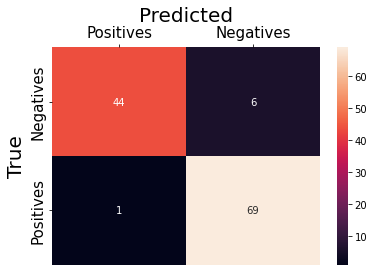

In [10]:
# Plot confusion matrix in a beautiful manner
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Positives', 'Negatives'], fontsize = 15)
ax.xaxis.tick_top()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(['Negatives', 'Positives'], fontsize = 15)
plt.show()

In [17]:
# Final evaluation of the model
scores = mnb.score(X_test, y_test)
print("Accuracy: %.2f%%" % scores)

Accuracy: 0.94%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


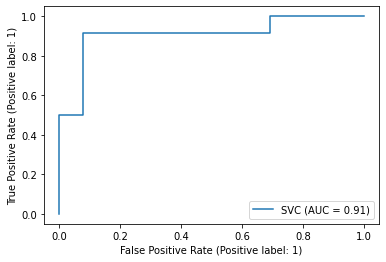

In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.svm import SVC

clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()